In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
# Label File
pd.read_csv('driver_imgs_list.csv')

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [4]:
# Loading ImageDataGenrator
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# Making an object of ImageData Genrator
imageGen = ImageDataGenerator(rescale=1.0/255)

In [6]:
# Getting Training Genrator 
train_gen=imageGen.flow_from_directory(
    'imgs/train',
    batch_size=32,
    target_size=(100,100),
    class_mode = 'categorical',
)

Found 22424 images belonging to 10 classes.


In [7]:
# Making our CNN Model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape =(100,100,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1024,activation='relu'),
    Dense(512,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              34669568  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5

In [8]:
# Fitting our model
model.fit_generator(train_gen,epochs=5)

c:\Program Files\Python36\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
701/701 [==============================] - 200s 284ms/step - loss: 0.4743 - accuracy: 0.8550
Epoch 2/5
701/701 [==============================] - 200s 285ms/step - loss: 0.0359 - accuracy: 0.9893
Epoch 3/5
701/701 [==============================] - 186s 266ms/step - loss: 0.0237 - accuracy: 0.9930
Epoch 4/5
701/701 [==============================] - 195s 278ms/step - loss: 0.0206 - accuracy: 0.9944
Epoch 5/5
701/701 [==============================] - 195s 278ms/step - loss: 0.0115 - accuracy: 0.9967


In [11]:
# Making an object of ImageData Genrator
imageGen = ImageDataGenerator(rescale=1.0/255)

In [10]:
# Making a test directory in output folder ( that can be readable and writeable )
import os
os.mkdir('test')
os.mkdir('test/all_classes')

In [9]:
# Importing copyfile so copy the testing images from the input test folder to ouput test folder
from shutil import copyfile

In [13]:
# Copying from the input test folder to ouput test folder
d = pd.read_csv('sample_submission.csv')
for row in d.values:
    file_name = row[0]
    copyfile( 'imgs/test/'+file_name , 'test/all_classes/'+file_name )

In [14]:
# Getting Testing Genrator 
test_gen=imageGen.flow_from_directory(
    'test',
    class_mode=None,
    shuffle=False,
    target_size=(100,100),
)

Found 79726 images belonging to 1 classes.


In [15]:
from tensorflow.keras.models import Model
model.save('CNN.h5')

In [16]:
from keras.models import load_model
model = load_model('CNN.h5')

In [17]:
# Predicting from test Genrator 
test_gen.reset()
predictions = model.predict_generator(test_gen,verbose=1)

c:\Program Files\Python36\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2492/2492 [==============================] - 495s 199ms/step


In [18]:
# Checking the shape of prediction
predictions.shape

(79726, 10)

In [19]:
# Converting the Prediction same as sample submission dataFrame
# Making the dictionary of The Predcition
d1 = pd.read_csv('sample_submission.csv')
d ={
    'img':list(d1.values[:,0]),
}
for i in range(0,10):
    d['c' + str(i)] = list(predictions[:,i])
d

{'img': ['img_1.jpg',
  'img_10.jpg',
  'img_100.jpg',
  'img_1000.jpg',
  'img_100000.jpg',
  'img_100001.jpg',
  'img_100002.jpg',
  'img_100003.jpg',
  'img_100004.jpg',
  'img_100005.jpg',
  'img_100007.jpg',
  'img_100008.jpg',
  'img_100009.jpg',
  'img_10001.jpg',
  'img_100010.jpg',
  'img_100011.jpg',
  'img_100012.jpg',
  'img_100013.jpg',
  'img_100014.jpg',
  'img_100016.jpg',
  'img_100017.jpg',
  'img_100018.jpg',
  'img_100019.jpg',
  'img_10002.jpg',
  'img_100020.jpg',
  'img_100022.jpg',
  'img_100023.jpg',
  'img_100024.jpg',
  'img_100025.jpg',
  'img_100028.jpg',
  'img_100030.jpg',
  'img_100031.jpg',
  'img_100032.jpg',
  'img_100033.jpg',
  'img_100034.jpg',
  'img_100035.jpg',
  'img_100037.jpg',
  'img_100038.jpg',
  'img_100039.jpg',
  'img_10004.jpg',
  'img_100040.jpg',
  'img_100042.jpg',
  'img_100043.jpg',
  'img_100044.jpg',
  'img_100047.jpg',
  'img_100049.jpg',
  'img_10005.jpg',
  'img_100051.jpg',
  'img_100052.jpg',
  'img_100053.jpg',
  'img_1000

In [20]:
# Converting the Prediction to DataFrame
df = pd.DataFrame(d)
df

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,1.464737e-08,1.279960e-10,6.192599e-11,1.388032e-11,3.200228e-10,0.999989,4.882745e-10,0.000001,6.776373e-07,9.383400e-06
1,img_10.jpg,1.960435e-07,5.544978e-07,2.260500e-04,9.013424e-06,2.168008e-07,0.999709,4.652405e-05,0.000004,1.580710e-06,2.419781e-06
2,img_100.jpg,2.207308e-02,1.004429e-01,8.415069e-01,1.286031e-04,8.601113e-05,0.004077,3.217634e-03,0.010327,5.149290e-03,1.299232e-02
3,img_1000.jpg,1.505187e-02,3.039908e-04,1.265690e-04,1.133953e-04,2.285922e-04,0.000010,3.104999e-01,0.000463,6.729944e-01,2.081602e-04
4,img_100000.jpg,9.713669e-06,3.162175e-07,1.777664e-08,7.886105e-05,5.605520e-05,0.024059,3.603091e-04,0.000045,9.619185e-01,1.347246e-02
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_99994.jpg,1.474068e-02,2.399205e-04,5.991977e-03,5.008384e-07,2.717869e-05,0.073871,9.373975e-03,0.726233,1.623201e-01,7.202224e-03
79722,img_99995.jpg,1.705296e-03,1.434518e-04,2.054873e-05,1.150030e-02,3.764263e-02,0.000157,1.150121e-03,0.000003,1.180085e-02,9.358771e-01
79723,img_99996.jpg,4.404578e-05,2.904737e-03,9.692721e-01,1.344296e-06,6.773456e-06,0.000004,1.457636e-02,0.000309,1.240995e-02,4.713482e-04
79724,img_99998.jpg,2.909597e-10,6.858706e-09,3.712663e-05,9.939926e-12,9.957062e-08,0.000042,9.990922e-01,0.000827,1.301250e-06,3.302238e-08


In [21]:
# Converting DataFrame into CSV File
df.to_csv('Prediction.csv',index=False)

In [ ]:
# c0: safe driving
# c1: texting - right
# c2: talking on the phone - right
# c3: texting - left
# c4: talking on the phone - left
# c5: operating the radio
# c6: drinking
# c7: reaching behind
# c8: hair and makeup
# c9: talking to passenger

In [22]:
# Getting Classes from Predictions
predicted_class_indices=np.argmax(predictions,axis=1)
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions_in_class = [labels[k] for k in predicted_class_indices]

In [33]:
filenames=test_gen.filenames
file=[]
for f in filenames:
    file.append(f.split('/')[0])
results=pd.DataFrame({"Filename":file ,
                      "Predictions":predictions_in_class})
results

,Filename,Predictions
0,all_classes\img_1.jpg,c5
1,all_classes\img_10.jpg,c5
2,all_classes\img_100.jpg,c2
3,all_classes\img_1000.jpg,c8
4,all_classes\img_100000.jpg,c8
...,...,...
79721,all_classes\img_99994.jpg,c7
79722,all_classes\img_99995.jpg,c9
79723,all_classes\img_99996.jpg,c2
79724,all_classes\img_99998.jpg,c6


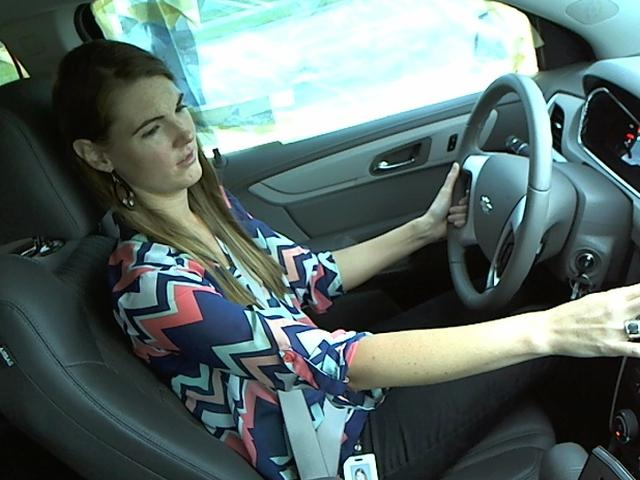

In [50]:
# Random Image of Testing Data
from IPython.display import Image
Image(filename=r'C:\Users\YMTS0513\Downloads\Distracted Driver Detection\test\all_classes\img_100012.jpg') 

In [51]:
# Choose entries with id p01
df_new = results[results['Filename'] == 'all_classes\img_100012.jpg']
print(df_new)

                      Filename Predictions
16  all_classes\img_100012.jpg          c5


In [ ]:
# Random Image of Testing Data
from IPython.display import Image
Image(filename=r'C:\Users\YMTS0513\Downloads\Distracted Driver Detection\test\all_classes\img_99994.jpg') 

In [ ]:
df_new1 = results[results['Filename'] == 'all_classes\img_100004.jpg']
print(df_new1)

In [45]:
# Predicting the class of Image
print(results.loc[results['Filename'] == r'C:\Users\YMTS0513\Downloads\Distracted Driver Detection\test\all_classes\img_99994.jpg'])
# c6 => drinking

Empty DataFrame
Columns: [Filename, Predictions]
Index: []


In [38]:
results

,Filename,Predictions
0,all_classes\img_1.jpg,c5
1,all_classes\img_10.jpg,c5
2,all_classes\img_100.jpg,c2
3,all_classes\img_1000.jpg,c8
4,all_classes\img_100000.jpg,c8
...,...,...
79721,all_classes\img_99994.jpg,c7
79722,all_classes\img_99995.jpg,c9
79723,all_classes\img_99996.jpg,c2
79724,all_classes\img_99998.jpg,c6


In [39]:
results['Filename']

0             all_classes\img_1.jpg
1            all_classes\img_10.jpg
2           all_classes\img_100.jpg
3          all_classes\img_1000.jpg
4        all_classes\img_100000.jpg
                    ...            
79721     all_classes\img_99994.jpg
79722     all_classes\img_99995.jpg
79723     all_classes\img_99996.jpg
79724     all_classes\img_99998.jpg
79725     all_classes\img_99999.jpg
Name: Filename, Length: 79726, dtype: object